In [1]:
import pandas as pd
import glob

# Load all the CSV files into a single DataFrame
csv_files = glob.glob('/media/rohit/mirlproject2/fetal head circumference/Thesis/csv/dsc_scores_*.csv')
df_all_dsc = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)

# Save the aggregated results
df_all_dsc.to_csv('/media/rohit/mirlproject2/fetal head circumference/Thesis/all_dsc_scores.csv', index=False)


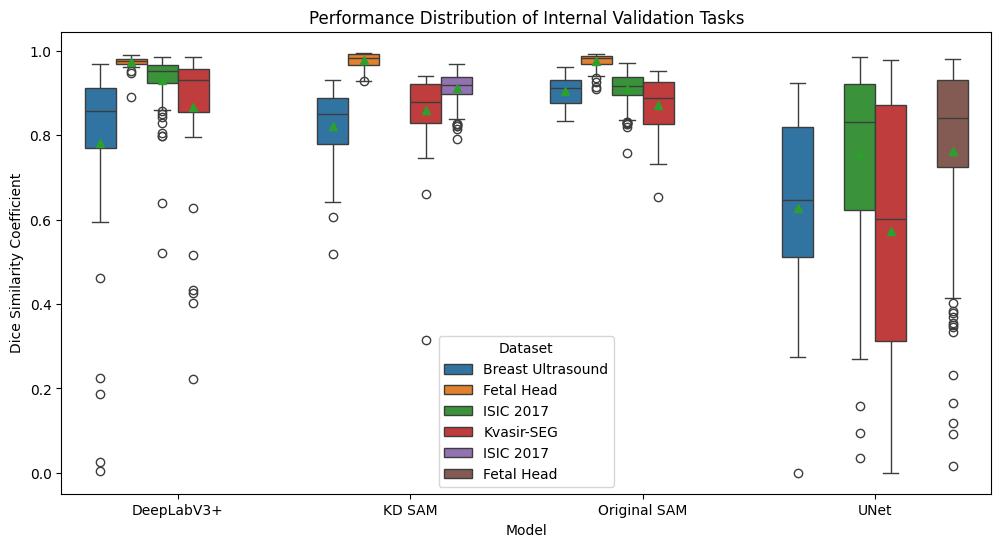

KeyError: 'Dataset'

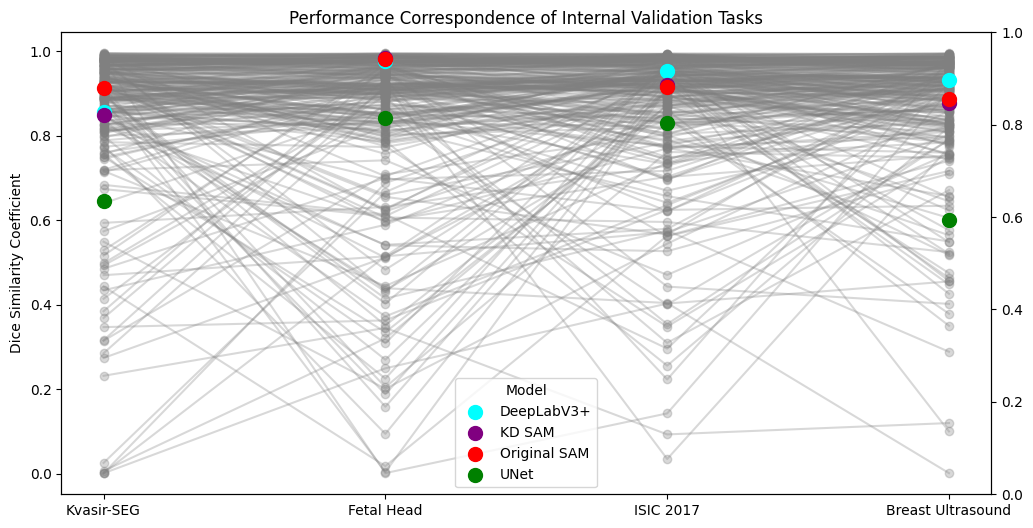

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the aggregated results
df_all_dsc = pd.read_csv('/media/rohit/mirlproject2/fetal head circumference/Thesis/all_dsc_scores.csv')

# Plot the Performance Distribution (Box Plot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='DSC', hue='Dataset', data=df_all_dsc, showmeans=True)
plt.title('Performance Distribution of Internal Validation Tasks')
plt.xlabel('Model')
plt.ylabel('Dice Similarity Coefficient')
plt.legend(title='Dataset')
plt.show()

# Calculate the median DSC for each task
median_dsc = df_all_dsc.groupby(['Dataset', 'Model'])['DSC'].median().reset_index()

# Calculate ranks for each task
ranks = df_all_dsc.groupby(['Dataset', 'Model'])['DSC'].rank(ascending=False, method='min').reset_index()

# Plot the Performance Correspondence (Podium Plot)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Upper part: scatter plot with lines connecting the same task
for dataset_name in df_all_dsc['Dataset'].unique():
    dataset_data = df_all_dsc[df_all_dsc['Dataset'] == dataset_name]
    for task in range(dataset_data.shape[0] // len(df_all_dsc['Model'].unique())):  # assuming equal tasks
        indices = range(task * len(df_all_dsc['Model'].unique()), (task + 1) * len(df_all_dsc['Model'].unique()))
        ax1.plot(range(1, 5), dataset_data.iloc[indices]['DSC'], marker='o', linestyle='-', color='gray', alpha=0.3)

# Scatter plot of medians
colors = ['cyan', 'purple', 'red', 'green']
for i, model_name in enumerate(df_all_dsc['Model'].unique()):
    ax1.scatter(range(1, 5), median_dsc[median_dsc['Model'] == model_name]['DSC'], color=colors[i], s=100, zorder=5, label=model_name)

# Label the scatter plot
ax1.set_xticks(range(1, 5))
ax1.set_xticklabels(['Kvasir-SEG', 'Fetal Head', 'ISIC 2017', 'Breast Ultrasound'])
ax1.set_ylabel('Dice Similarity Coefficient')
ax1.set_title('Performance Correspondence of Internal Validation Tasks')
ax1.legend(title='Model')

# Lower part: bar chart of ranks
ax2 = ax1.twinx()
rank_counts = ranks.groupby(['Dataset', 'Model'])['DSC'].value_counts().unstack().fillna(0)
rank_counts.plot(kind='bar', stacked=True, ax=ax2, alpha=0.6, width=0.3, position=1.1)

# Label the bar chart
ax2.set_ylabel('Frequency of Achieved Ranks')
ax2.legend(title='Model')

plt.show()


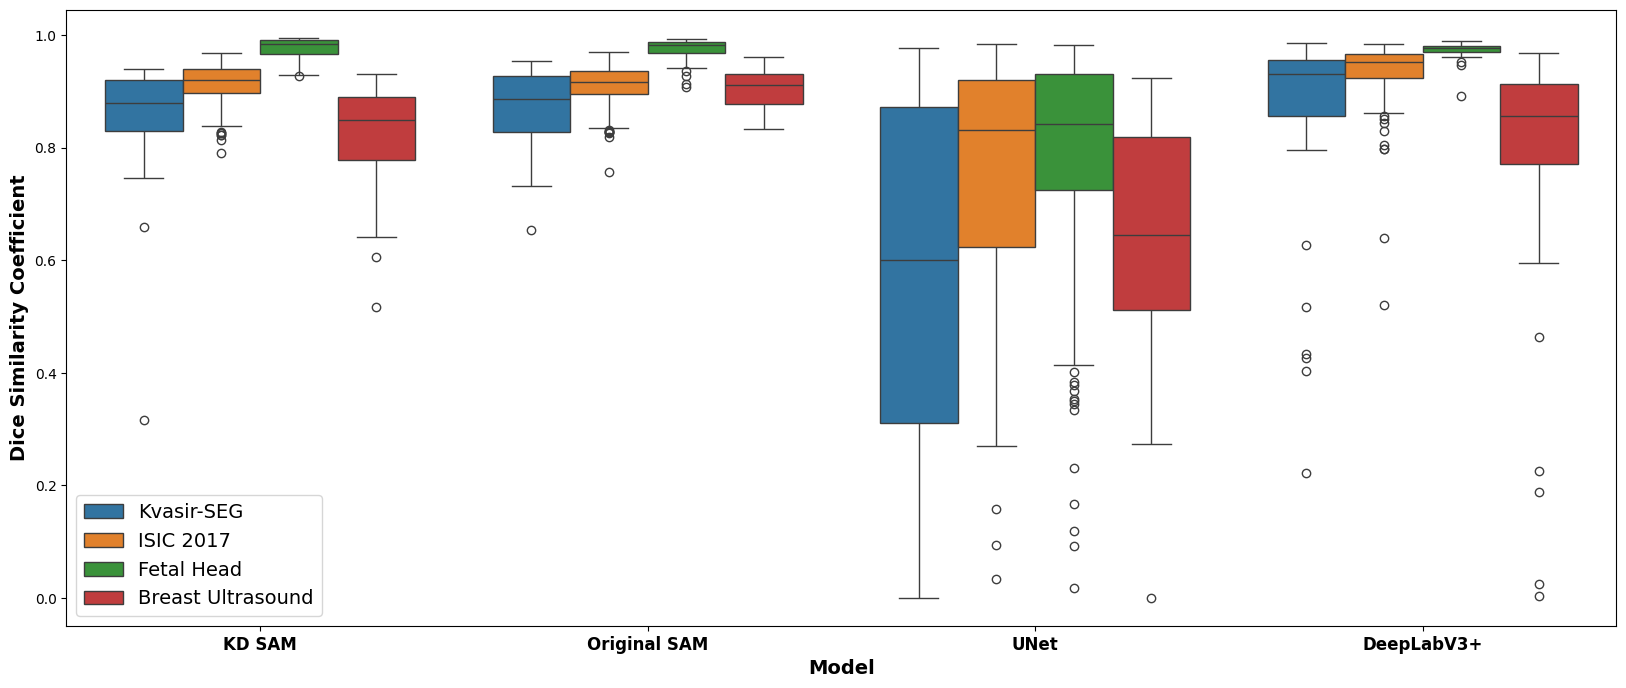

In [35]:
# Box Plot
#plt.subplot(2, 2, 1)
plt.figure(figsize=(20, 8))
sns.boxplot(data=df, x='Model', y='DSC', hue='Dataset', order=model_order,hue_order=dataset_order)
#plt.title('Box Plot of DSC Scores by Model and Dataset')
plt.xticks(rotation=0,fontsize=12, fontweight='bold')
plt.xlabel('Model',fontsize=14, fontweight='bold')
plt.ylabel('Dice Similarity Coefficient',fontsize=14, fontweight='bold')
plt.legend(loc='lower left', fontsize=14)
plt.show()

In [ ]:

plt.legend(loc='lower left', fontsize=14)
plt.show()

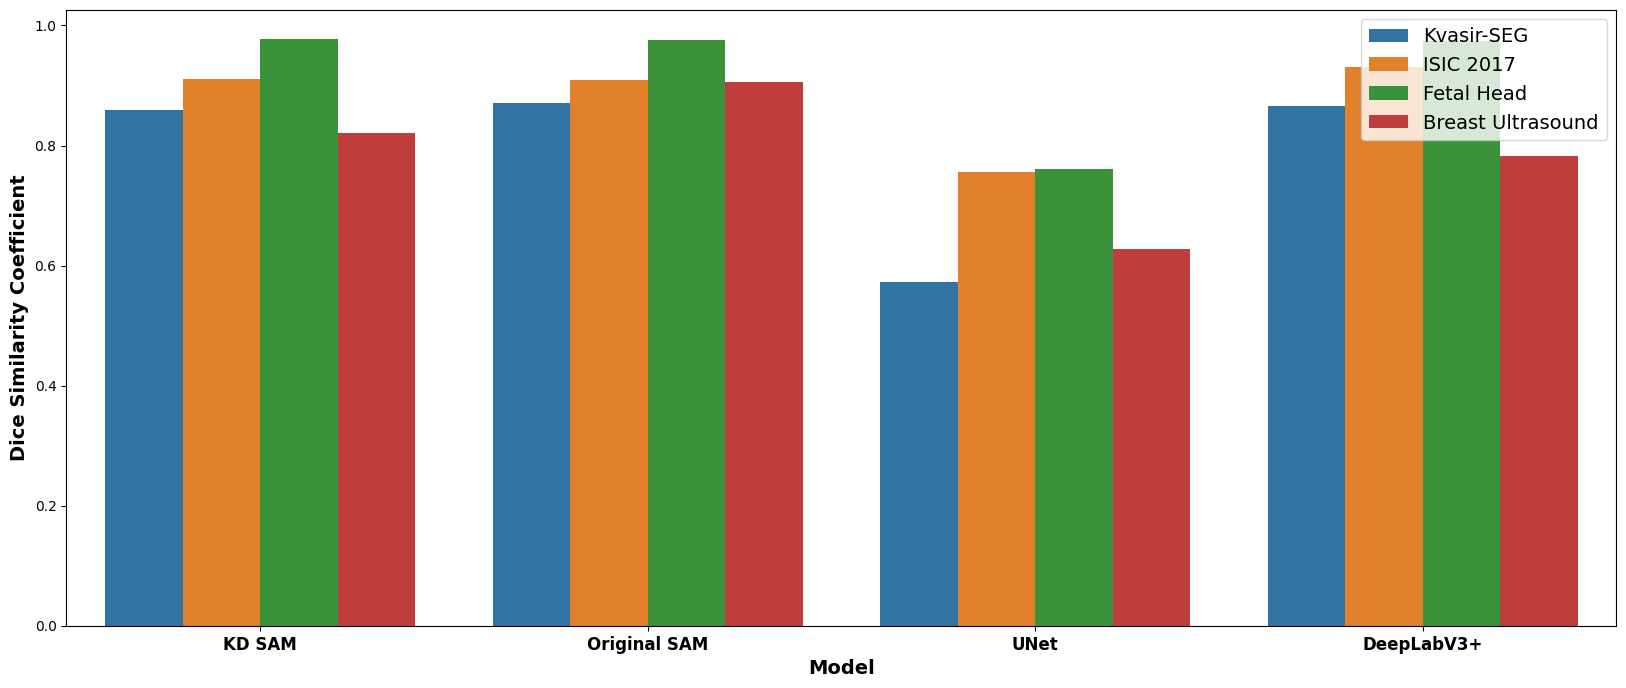

In [34]:
# Bar Chart
plt.figure(figsize=(20, 8))
sns.barplot(data=summary, x='Model', y='mean_DSC', hue='Dataset', order=model_order,hue_order=dataset_order)
# plt.title('Bar Chart of Mean DSC Scores by Model and Dataset')
plt.xticks(rotation=0,fontsize=12, fontweight='bold')
plt.xlabel('Model',fontsize=14, fontweight='bold')
plt.ylabel('Dice Similarity Coefficient',fontsize=14, fontweight='bold')
plt.legend(loc='upper right',fontsize=14)
plt.show()

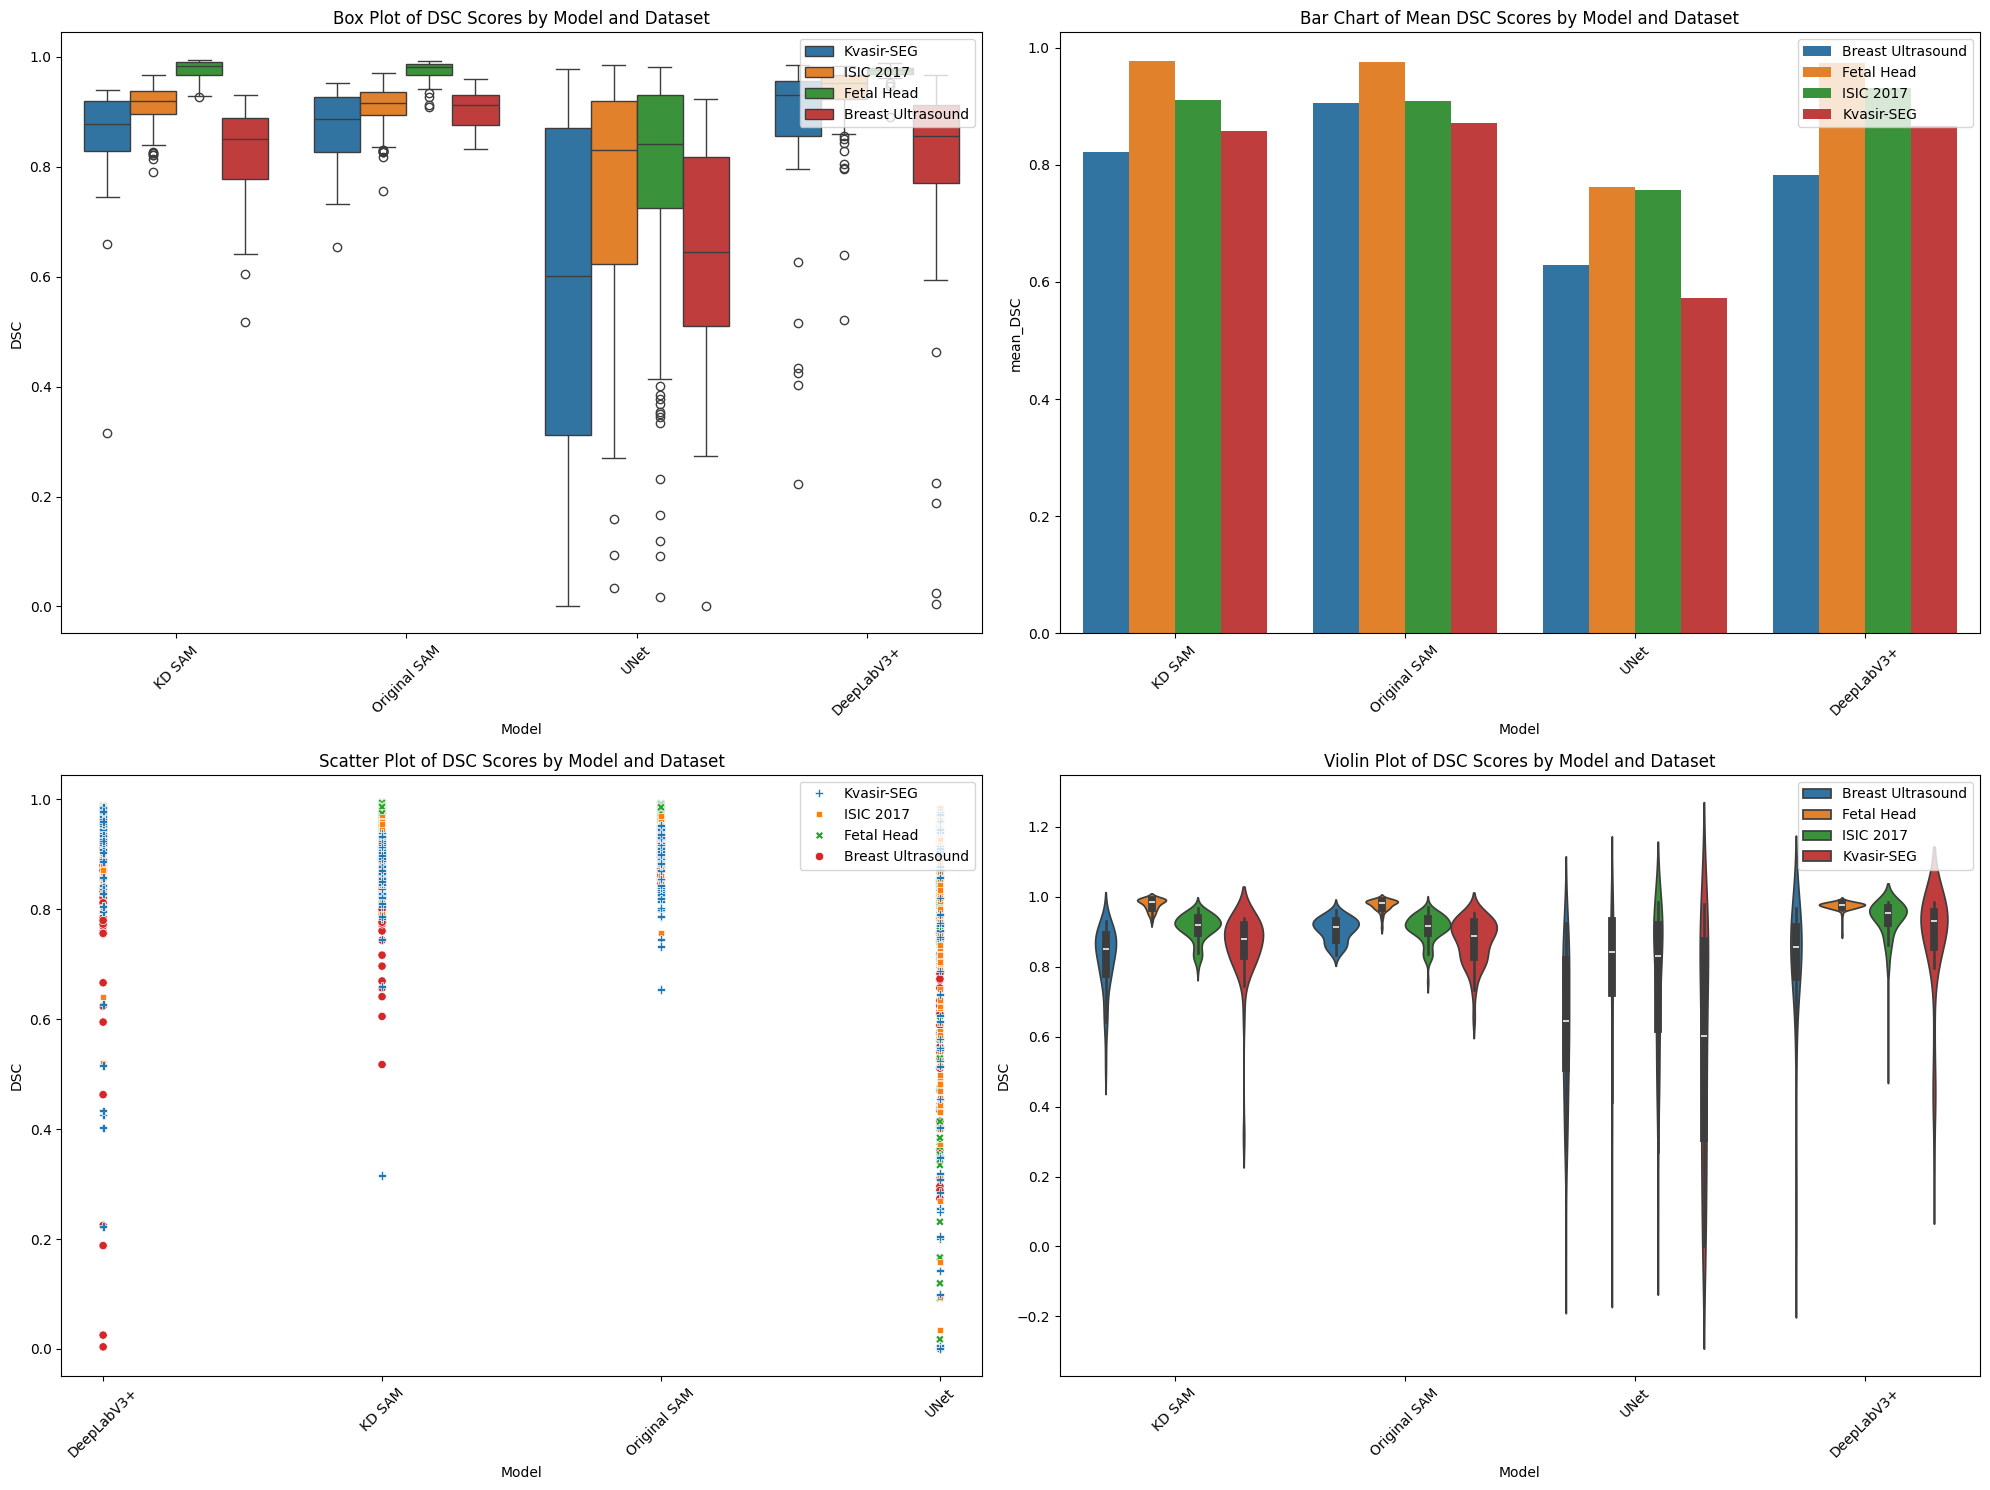

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '/media/rohit/mirlproject2/fetal head circumference/Thesis/all_dsc_scores.csv'
df = pd.read_csv(file_path)

# Clean the Dataset names by stripping any leading or trailing spaces
df['Dataset'] = df['Dataset'].str.strip()

# Order the datasets in reverse sequence
dataset_order = df['Dataset'].unique()[::-1]

# Order the models as requested
model_order = ['KD SAM', 'Original SAM', 'UNet', 'DeepLabV3+']

# Summarize DSC scores for each model and dataset
summary = df.groupby(['Model', 'Dataset']).agg(
    mean_DSC=('DSC', 'mean'),
    std_DSC=('DSC', 'std'),
    min_DSC=('DSC', 'min'),
    max_DSC=('DSC', 'max')
).reset_index()

# Setting up the figure
plt.figure(figsize=(20, 15))

# Box Plot
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='Model', y='DSC', hue='Dataset', order=model_order,hue_order=dataset_order)
plt.title('Box Plot of DSC Scores by Model and Dataset')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# Bar Chart
plt.subplot(2, 2, 2)
sns.barplot(data=summary, x='Model', y='mean_DSC', hue='Dataset', order=model_order)
plt.title('Bar Chart of Mean DSC Scores by Model and Dataset')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# Scatter Plot
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Model', y='DSC', hue='Dataset', style='Dataset', hue_order=dataset_order)
plt.title('Scatter Plot of DSC Scores by Model and Dataset')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# Violin Plot
plt.subplot(2, 2, 4)
sns.violinplot(data=df, x='Model', y='DSC', hue='Dataset', order=model_order)
plt.title('Violin Plot of DSC Scores by Model and Dataset')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Mobile sam